# Detecting CG islands using Multinomial Hidden Markov Models

In computational genomics, CG sites are regions of DNA where a cytosine nucleotide (C) is followed by a guanine nucleotide (G) in the linear sequence of bases along its 5' → 3' direction. CG islands are regions with a high frequency (over 50%) of CG sites. CG islands are subject of theoretical interest in genetics for several reasons, one of which is that CG islands are frequently found in promoter regions of a DNA string, i.e. regions that initiate transcription of a particular gene.

In this experiment we train a Multinomial Hidden Markov Model with two hidden states to predict DNA strings being either CG islands or non-CG islands.

In [ ]:
import numpy as np
from hmmlearn import hmm
from Bio import SeqIO
np.random.seed(42)

In [224]:
train_data = next(SeqIO.parse("cpg.fa_", "fasta"))
test_data = list(SeqIO.parse("cpg_test.fa_", "fasta"))

In [83]:
train_data

SeqRecord(seq=Seq('GGACAAGGCCACAATCGGCTGTCTGCATAGATACGAGCTTCGCCCCATAGAGAT...GCA', SingleLetterAlphabet()), id='training', name='training', description='training sequence for cpg islands', dbxrefs=[])

Our data preprocesssing includes joining single nucleotydes into dinucletydes and mapping them to integers.

In [84]:
DINUCLEOTYDES = {key: value for key, value in 
                 zip((first+second for first in 'ACTG' for second in 'ACTG'), range(16))}
CG_POSITION = DINICLEOTYDES['CG']

In [85]:
DINUCLEOTYDES, CG_POSITION

({'AA': 0,
  'AC': 1,
  'AG': 3,
  'AT': 2,
  'CA': 4,
  'CC': 5,
  'CG': 7,
  'CT': 6,
  'GA': 12,
  'GC': 13,
  'GG': 15,
  'GT': 14,
  'TA': 8,
  'TC': 9,
  'TG': 11,
  'TT': 10},
 7)

In [206]:
def extract_dinucleotydes(data):
    result = []
    for i in range(1, len(data)-1, 2):
        dinucletotyde = data[i] + data[i+1]
        result.append(DINUCLEOTYDES[dinucletotyde])
    return result

In [207]:
train_data = extract_dinucleotydes(train_data)
train_data = np.array(train_data).T
train_data

array([12,  4,  3, ...,  0, 15, 13])

In [147]:
initial_emission_matrix = np.array(
    [[0.95, 0.05],
     [0.05, 0.95]]
)
model = hmm.MultinomialHMM(n_components=2, transmat_prior=initial_emission_matrix, 
                           n_iter=50, verbose=True)
model.fit(train_data)

/Users/tomek/.virtualenvs/x/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


         1    -9812557.4783             +nan


         2    -9258857.7110     +553699.7673


         3    -9258509.5112        +348.1998


         4    -9258181.2202        +328.2911


         5    -9257866.1408        +315.0794


         6    -9257558.4711        +307.6697


         7    -9257253.0678        +305.4033


         8    -9256945.2480        +307.8197


         9    -9256630.6412        +314.6069


        10    -9256305.0658        +325.5754


        11    -9255964.4226        +340.6432


        12    -9255604.6103        +359.8122


        13    -9255221.4471        +383.1633


        14    -9254810.6038        +410.8433


        15    -9254367.5453        +443.0585


        16    -9253887.4777        +480.0676


        17    -9253365.3089        +522.1688


        18    -9252795.6217        +569.6873


        19    -9252172.6654        +622.9562


        20    -9251490.3737        +682.2918


        21    -9250742.4218        +747.9518


        22    -9249922.3346        +820.0872


        23    -9249023.6676        +898.6670


        24    -9248040.2775        +983.3901


        25    -9246966.7082       +1073.5694


        26    -9245798.7141       +1167.9941


        27    -9244533.9248       +1264.7893


        28    -9243172.6471       +1361.2777


        29    -9241718.7458       +1453.9013


        30    -9240180.5107       +1538.2351


        31    -9238571.3376       +1609.1731


        32    -9236910.0120       +1661.3256


        33    -9235220.3591       +1689.6529


        34    -9233530.0949       +1690.2642


        35    -9231868.8631       +1661.2318


        36    -9230265.6804       +1603.1828


        37    -9228746.2274       +1519.4530


        38    -9227330.5447       +1415.6827


        39    -9226031.6229       +1298.9218


        40    -9224855.1161       +1176.5068


        41    -9223800.1086       +1055.0075


        42    -9222860.5815        +939.5271


        43    -9222027.1634        +833.4180


        44    -9221288.7740        +738.3894


        45    -9220633.9282        +654.8457


        46    -9220051.6291        +582.2991


        47    -9219531.8756        +519.7535


        48    -9219065.8841        +465.9915


        49    -9218646.1111        +419.7730


        50    -9218266.1724        +379.9387


MultinomialHMM(algorithm='viterbi', init_params='ste', n_components=2,
        n_iter=50, params='ste',
        random_state=<mtrand.RandomState object at 0x103d9f7e0>,
        startprob_prior=1.0, tol=0.01,
        transmat_prior=array([[0.95, 0.05],
       [0.05, 0.95]]),
        verbose=True)

In [148]:
model.emissionprob_

array([[0.05958494, 0.03102433, 0.06364199, 0.06436151, 0.09005804,
        0.05651969, 0.07584826, 0.20447515, 0.06246039, 0.03428703,
        0.06257462, 0.06611098, 0.03992122, 0.00068426, 0.04981098,
        0.03863663],
       [0.03111409, 0.11702751, 0.0257118 , 0.02559461, 0.00419353,
        0.05796211, 0.0224915 , 0.03154308, 0.02764945, 0.11230858,
        0.02785975, 0.0229648 , 0.0924426 , 0.22774732, 0.07918651,
        0.09420277]])

In [149]:
model.emissionprob_[:, CG_POSITION]

array([0.20447515, 0.03154308])

In [150]:
model.transmat_

array([[0.73421905, 0.26578095],
       [0.34843564, 0.65156436]])

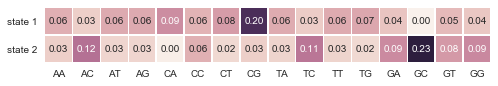

In [249]:
def plot_emmision_probabilities(probs):
    import seaborn as sns
    from matplotlib import pyplot as plt
    fig, ax = plt.subplots(figsize=(8, 8))
    ax = sns.heatmap(probs, square=True, yticklabels=['state 1', 'state 2'], 
                     xticklabels=list(DINUCLEOTYDES.keys()), annot=True, 
                     linewidths=.5, ax=ax, cbar=False, fmt='.2f')
    
plot_emmision_probabilities(model.emissionprob_)

The emission probability matrix of symbols given hidden state has a clear biological interpretation: when we're currently in a CG island (state 1), the probability of emitting a CG dinucleotyde is significantly higher than outside CG island (state 2).

## Inferring hidden states for test sequences

In [225]:
test_data = list(map(extract_dinucleotydes, test_data))

In [245]:
with open('output.txt', 'w') as output_file:
    for i, sequence in enumerate(test_data):
        print(f'Predicting sequence {i} with size {len(sequence)}.')
        hidden_states = model.predict(np.array(sequence).reshape(-1, 1))
        output_file.write(' '.join([str(state) for state in hidden_states]) + '\n')

Predicting sequence 0 with size 698.
Predicting sequence 1 with size 914.
Predicting sequence 2 with size 4.
Predicting sequence 3 with size 756.
Predicting sequence 4 with size 1212.
Predicting sequence 5 with size 361.
Predicting sequence 6 with size 885.
Predicting sequence 7 with size 986.
Predicting sequence 8 with size 1122.
Predicting sequence 9 with size 763.
Predicting sequence 10 with size 119.
Predicting sequence 11 with size 1260.
Predicting sequence 12 with size 2390.
Predicting sequence 13 with size 519.
Predicting sequence 14 with size 886.
Predicting sequence 15 with size 115.
Predicting sequence 16 with size 2408.
Predicting sequence 17 with size 881.
Predicting sequence 18 with size 436.
Predicting sequence 19 with size 639.
Predicting sequence 20 with size 153.
Predicting sequence 21 with size 546.
Predicting sequence 22 with size 115.
Predicting sequence 23 with size 76.
Predicting sequence 24 with size 379.
Predicting sequence 25 with size 690.
Predicting sequence 

In [247]:
!head -n 1 output.txt

1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 

Note that again 1 corresponds to a CG island.